In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [6]:
drowsy_path = r'.\data\drowsy'
not_drowsy_path = r'.\data\notdrowsy'

In [7]:
import os

# Define paths
drowsy_path = r'.\data\drowsy'  # Use raw string (r) to avoid issues with backslashes
not_drowsy_path = r'.\data\notdrowsy'

# Function to count files in a folder
def count_files_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count files in each folder
drowsy_count = count_files_in_folder(drowsy_path)
not_drowsy_count = count_files_in_folder(not_drowsy_path)

print(f"Number of images in 'drowsy' folder: {drowsy_count}")
print(f"Number of images in 'notdrowsy' folder: {not_drowsy_count}")

Number of images in 'drowsy' folder: 36030
Number of images in 'notdrowsy' folder: 30491


In [8]:
# Define paths


# Function to load images from a folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to 64x64
            images.append(img)
            labels.append(label)
    return images, labels

# Load images
drowsy_images, drowsy_labels = load_images_from_folder(drowsy_path, 1)
not_drowsy_images, not_drowsy_labels = load_images_from_folder(not_drowsy_path, 0)

# Combine datasets
X = np.array(drowsy_images + not_drowsy_images)
y = np.array(drowsy_labels + not_drowsy_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1663/1663 [==============================] - 88s 52ms/step - loss: 0.2109 - accuracy: 0.9035 - val_loss: 0.0902 - val_accuracy: 0.9611
Epoch 2/5
1663/1663 [==============================] - 83s 50ms/step - loss: 0.0752 - accuracy: 0.9695 - val_loss: 0.0716 - val_accuracy: 0.9687
Epoch 3/5
1663/1663 [==============================] - 88s 53ms/step - loss: 0.0514 - accuracy: 0.9799 - val_loss: 0.0395 - val_accuracy: 0.9845
Epoch 4/5
1663/1663 [==============================] - 85s 51ms/step - loss: 0.0437 - accuracy: 0.9830 - val_loss: 0.0484 - val_accuracy: 0.9811
Epoch 5/5
1663/1663 [==============================] - 84s 51ms/step - loss: 0.0364 - accuracy: 0.9864 - val_loss: 0.0295 - val_accuracy: 0.9886


416/416 [==============================] - 6s 14ms/step - loss: 0.0295 - accuracy: 0.9886
Test accuracy: 0.9886


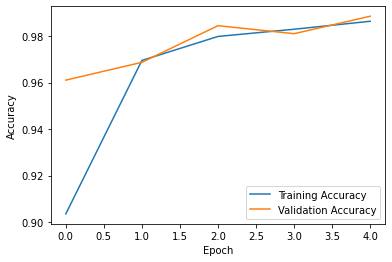

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Save the model
model.save('drowsiness_detection_model.h5')

In [2]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('drowsiness_detection_model.h5')

# Function to predict drowsiness
def predict_drowsiness(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return 'Drowsy' if prediction > 0.5 else 'Not Drowsy'

# Example usage
image_path = r'.\data\drowsy.jpg'
print(predict_drowsiness(image_path))

1/1 [==============================] - 0s 201ms/step
Drowsy


In [3]:
image_path = r'.\data\notdrowsy.jpg'
print(predict_drowsiness(image_path))

1/1 [==============================] - 0s 16ms/step
Not Drowsy


In [5]:
image_path = r'.\data\abhi_pic.jpg'
print(predict_drowsiness(image_path))

1/1 [==============================] - 0s 20ms/step
Drowsy
